The following is a portion the preprocessing of the data for the Kaggle Competition titled "Petfinder Adoption Prediction"

The first feature to be preprocessed is the gender. For this feature, the three options (male, female, multiple) will be split into 3 separate predictors using the OHE (one hot encoding) scheme.

In [1]:
import numpy
from sklearn import preprocessing
import pandas
import matplotlib
import matplotlib.pyplot as plt

In [2]:
trainingData = pandas.read_csv('train.csv')

In [3]:
trainingData.head()

Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   
2     1       Brisco    1     307       0       1       2       7       0   
3     1         Miko    4     307       0       2       1       2       0   
4     1       Hunter    1     307       0       1       1       0       0   

   MaturitySize  ...  Health  Quantity  Fee  State  \
0             1  ...       1         1  100  41326   
1             2  ...       1         1    0  41401   
2             2  ...       1         1    0  41326   
3             2  ...       1         1  150  41401   
4             2  ...       1         1    0  41326   

                          RescuerID  VideoAmt  \
0  8480853f516546f6cf33aa88cd76c379         0   
1  3082c7125d8fb66f7dd4bff4192c8b14         0   
2  fa90fa5b1ee11c86938398b60abc32cb         0   
3  9238e4f44c71a75282e62f7136c6b240         0   
4  95481e953f8aed9ec3d16fc4509537e8         0   

                                         Description      PetID PhotoAmt  \
0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3      1.0   
1  I just found it alone yesterday near my apartm...  6296e909a      2.0   
2  Their pregnant mother was dumped by her irresp...  3422e4906      7.0   
3  Good guard dog, very alert, active, obedience ...  5842f1ff5      8.0   
4  This handsome yet cute boy is up for adoption....  850a43f90      3.0   

   AdoptionSpeed  
0              2  
1              0  
2              3  
3              2  
4              2  

[5 rows x 24 columns]

In [4]:
genderEncoding = pandas.get_dummies(trainingData['Gender'])
genderEncoding.columns = ['male','female','multiple']
genderEncoding = genderEncoding.add_prefix('Gender_')

The next features which will be encoded are the colour features. For each animal there is the option of listing up to 3 colours. There are 7 possible colours including: black, brown, golden, yellow, cream, gray, and white. 

In [5]:
Colour1Encoding = pandas.get_dummies(trainingData['Color1'])
Colour1Encoding.columns = ['black','brown','golden','yellow','cream','gray','white']
Colour1Encoding = Colour1Encoding.add_prefix('Colour1_')

In [6]:
Colour2Encoding = pandas.get_dummies(trainingData['Color2'])
Colour2Encoding.columns = ['none','brown','golden','yellow','cream','gray','white']
Colour2Encoding = Colour2Encoding.add_prefix('Colour2_')

In [7]:
Colour3Encoding = pandas.get_dummies(trainingData['Color3'])
Colour3Encoding.columns = ['none','golden','yellow','cream','gray','white']
Colour3Encoding = Colour3Encoding.add_prefix('Colour3_')

In [8]:
MaturityEncoding = pandas.get_dummies(trainingData['MaturitySize'])
MaturityEncoding.columns = ['Small','Medium','Large','XLarge']
MaturityEncoding = MaturityEncoding.add_prefix('Maturity_')

In [9]:
FurLengthEncoding = pandas.get_dummies(trainingData['FurLength'])
FurLengthEncoding.columns = ['Short','Medium','Long']
FurLengthEncoding = FurLengthEncoding.add_prefix('FurLength_')

(array([5934., 6539., 1367.,  605.,  261.,  116.,   63.,   37.,   33.,
          38.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

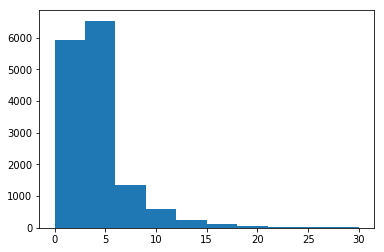

In [10]:
picturesEncoding = trainingData['PhotoAmt'].copy(deep=True)
plt.hist(picturesEncoding)

In [11]:
for x in range (0,14992):
    if 1 <= picturesEncoding.loc[x] <= 5:
        picturesEncoding.loc[x] = 1
    elif picturesEncoding.loc[x] > 5:
        picturesEncoding.loc[x] = 2

In [12]:
plt.hist(picturesEncoding)

(array([  341.,     0.,     0.,     0.,     0., 12132.,     0.,     0.,
            0.,  2520.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

In [13]:
picturesEncoding = pandas.get_dummies(picturesEncoding)
picturesEncoding.columns = ['None','Some','Many']
picturesEncoding = picturesEncoding.add_prefix('pics_')

In [14]:
videoEncoding = trainingData['VideoAmt'].copy(deep=True)
plt.hist(videoEncoding)

(array([1.4419e+04, 4.1700e+02, 9.2000e+01, 3.6000e+01, 0.0000e+00,
        1.5000e+01, 7.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

In [15]:
for x in range (0,14992):
    if 1 <= videoEncoding.loc[x] <= 5:
        videoEncoding.loc[x] = 1
    elif videoEncoding.loc[x] > 5:
        videoEncoding.loc[x] = 2

In [16]:
videoEncoding = pandas.get_dummies(videoEncoding)
videoEncoding.columns = ['None','Some','Many']
videoEncoding = videoEncoding.add_prefix('vids_')

In [19]:
DimitriPreProcessing = pandas.concat([genderEncoding,Colour1Encoding,Colour2Encoding,Colour3Encoding,MaturityEncoding,FurLengthEncoding,picturesEncoding,videoEncoding],axis=1, sort=False)

In [20]:
DimitriPreProcessing.head()

Gender_male  Gender_female  Gender_multiple  Colour1_black  Colour1_brown  \
0            1              0                0              1              0   
1            1              0                0              1              0   
2            1              0                0              0              1   
3            0              1                0              1              0   
4            1              0                0              1              0   

   Colour1_golden  Colour1_yellow  Colour1_cream  Colour1_gray  Colour1_white  \
0               0               0              0             0              0   
1               0               0              0             0              0   
2               0               0              0             0              0   
3               0               0              0             0              0   
4               0               0              0             0              0   

   ...  Maturity_XLarge  FurLength_Short  FurLength_Medium  FurLength_Long  \
0  ...                0                1                 0               0   
1  ...                0                0                 1               0   
2  ...                0                0                 1               0   
3  ...                0                1                 0               0   
4  ...                0                1                 0               0   

   pics_None  pics_Some  pics_Many  vids_None  vids_Some  vids_Many  
0          0          1          0          1          0          0  
1          0          1          0          1          0          0  
2          0          0          1          1          0          0  
3          0          0          1          1          0          0  
4          0          1          0          1          0          0  

[5 rows x 36 columns]

In [22]:
DimitriPreProcessing.to_csv('DimitriPreProcessing.csv',index=False)